<a href="https://colab.research.google.com/github/amanupg/Machine-Learning/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The project is supposed to predict the sentiment of a given text, and predict if the text is positive, negative or neutral in nature.

### Importing necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re
import nltk
import string
import nlp_utils
import collections
import contractions
import nlp_utils as nu
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Loading data.
with open('TextAnalytics.txt','r') as f:
    text = f.read()

In [ ]:
text
### The data is in the form of a text.

# Text Normalization

### Text normalization is the process of transforming a text into a canonical (standard) form. For example, the word “gooood” and “gud” can be transformed to “good”, its canonical form. Another example is mapping of near identical words such as “stopwords”, “stop-words” and “stop words” to just “stopwords”

In [ ]:
# splitting at ( \n ).
text=text.split('\n')
# Separating at new line using '\n'

In [ ]:
# splitting at ( \t ).
corpus = [text]
for sent in text:
    corpus.append(sent.split('\t'))
# Splitting String by tab(\t)

In [ ]:
letters_only = re.sub(r'[^a-zA-Z]',
                          " ",
                          str(corpus))
# Taking only letters

### Tokenization
Tokenization is the process by which big quantity of text is divided into smaller parts called tokens.

Natural language processing is used for building applications such as Text classification, intelligent chatbot, sentimental analysis, language translation, etc. It becomes vital to understand the pattern in the text to achieve the above-stated purpose. These tokens are very useful for finding such patterns as well as is considered as a base step for stemming and lemmatization.

Sentence tokenization is the process of splitting text into individual sentences. ... It does this by looking for the types of textual constructs that confuse the tokenizer and replacing them with single words.

In [ ]:
# converting to lowercase.
letters_only=letters_only.lower()

token=nltk.sent_tokenize(letters_only)
token

### Alphanumeric characters

In [ ]:
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token):
    tokens = nlp_utils.w_tokenization(token)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda = list(map(clean_nda,token))

corpus_nda
### Alpha numeric characters and decimals have been replaced with characters

### Removing Contractions.
It is a process where words like isn't, didn't are expanded to is not did not.
isn't --> is not,
I'm --> I am,
they're --> they are,
shouldn't --> should not,
can't --> can not

In [ ]:
conm = contractions.CONTRACTION_MAP
def contraction_remove(corpus_nda):
    for key,value in conm.items():
        corpus_nda = re.sub(r"{}".format(key),'{}'.format(value),corpus_nda)

    return corpus_nda

special = string.punctuation
def w_tokenization(corpus_nda):
    # convert into lower case
    corpus_nda = corpus_nda.lower()
    # contraction
    corpus_nda = contraction_remove(corpus_nda)
    #
    tokens = nltk.word_tokenize(corpus_nda) # word tokens
## contractions have been expanded and the letters have been converted to lowercase.

In [ ]:
corpus_nda
## corpus_nda with expanded contractions and converted to lowercase.

In [ ]:
data = [corpus_nda]
for sent in text:
    data.append(sent.split('\t'))
# Separating at tab

In [ ]:
data.append(sent.split('\n'))
# Separating at newline

In [ ]:
data
# Cleaned text

In [ ]:
df = pd.DataFrame(data)
## Saving the data into a dataframe.

In [ ]:
df

In [ ]:
df.drop([1,2,3,4,5,6],axis=1,inplace=True)
# dropping unnecessary columns.

In [ ]:
df= df.rename(columns={0: 'Text'})
# Renaming the column 0 as 'Text'

#### Final Dataset.

In [ ]:
df

### Rows 0,1 and 1000 and 1001 have repeated hence needs to be cleaned.

In [ ]:
df.drop(df.index[:1], inplace=True)
# row 1 has repeated so it is dropped.

In [ ]:
df.drop(df.index[1000:], inplace=True)
# row 1000 has repeated aswell, so it is dropped.

In [ ]:
df

### Removing additional characters present in the dataframe.

In [ ]:
## We can further see that there are still some special characters in the dataframe which have to be treated.
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("< />", '', regex=True, inplace=True)

In [ ]:
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip(')')
df['Text'] = df['Text'].str.strip('(')
## Using the strip function in order to delete the special characters.

In [ ]:
df

## Lemmatization of the text column

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
Lemmatization will generate the root form of the inflected words

In [ ]:
df['Text'] = df['Text'].apply(nu.lemmatization_sentence)

In [ ]:
Text=df['Text']

In [ ]:
token=Text.as_matrix(columns=None)
## as_matrix() function is used to convert the given series or dataframe object to Numpy-array representation.

In [ ]:
token=nltk.sent_tokenize(str(token))
## Sentence tokenization

In [ ]:
data = np.array(token)
## Saving token in form of array

In [ ]:
stop = stopwords.words('english')
## Saving stopwords in stop

### Removing stopwords from the dataframe

In [ ]:
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]

print(tokens_without_sw)
## Removing stopwords from the text and printing the words without stopwords

['[', '``', '[', "'one", 'reviewer', 'mention', 'watch', 'oz', 'episode', 'youll', 'hook', 'right', 'exactly', 'happen', 'me.the', 'first', 'thing', 'strike', 'oz', 'utality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word.it', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many..aryans', 'muslim', 'gangstas', 'latinos', 'christian', 'italian', 'irish', '...', '.so', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away.i', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience'

# Visualization

In [ ]:
stopwords = set(stopwords.words("english"))
## Removing stopwords for wordcloud visualization

In [ ]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
## WordCloud is a technique to show which words are the most frequent among the given text

### Visualizing the highest repeating words in the dataframe using  the wordcloud.

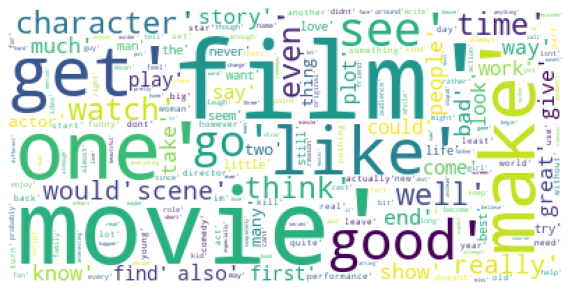

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting the number of times a word has repeated through out the data.

In [ ]:
tokens_without_sw=(str(tokens_without_sw))

In [ ]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
# Removing stopwords as creating two lists to display the words and their counts

In [ ]:
counted_words.most_common(100) # the word 'movie' has repeated for 2081 times.

# Visualizing top 10 repeated/common words using bar graph.

<BarContainer object of 10 artists>

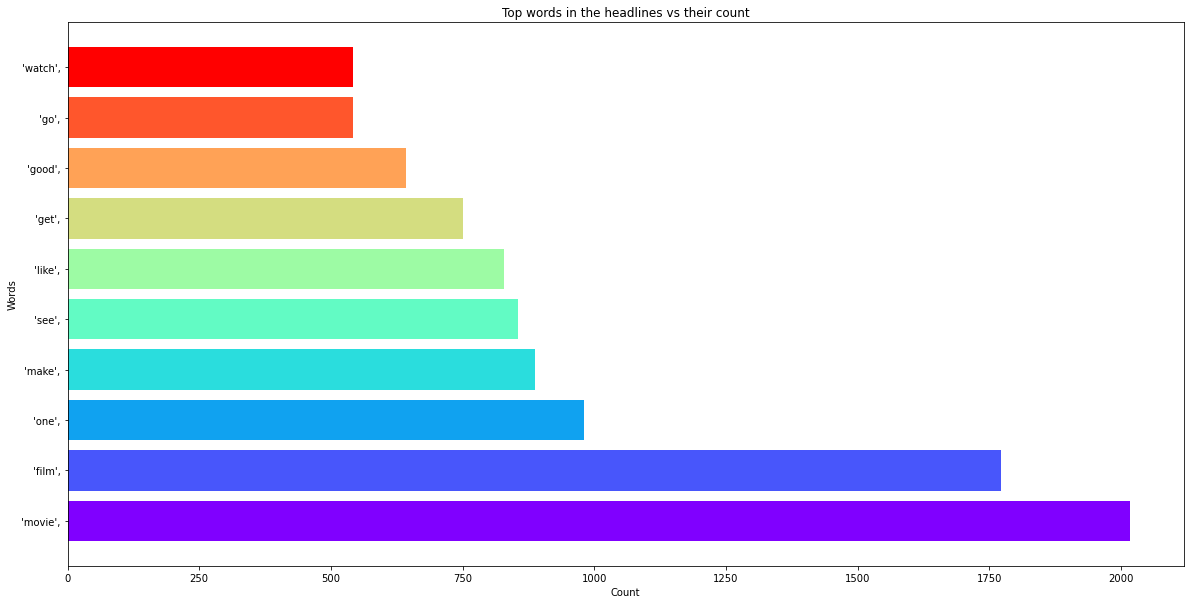

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Sentiment Analysis.

### Vader sentiment analysis is done in order to find if a given (Word) is positive, negative or  neutral in nature.
VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as to whether it is positive or negative, and in many cases, how positive or negative. Below you can see an excerpt from VADER’s lexicon, where more positive words have higher positive ratings and more negative words have lower negative ratings.
Vader sentiment analysis for a given (word) if positive, negative or  neutral in nature.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

#print('Positive:',pos_word_list)
#print('Neutral:',neu_word_list)
#print('Negative:',neg_word_list)
#score = sid.polarity_scores(sentence)
#print('\nScores:', score)

In [ ]:
#pos_word_list[:100]
#neg_word_list[:100]

### Top 100 Positive words.

In [ ]:
print(list(iter(pos_word_list[:100]))) # These are the top 100 positive words found in the dataset.

["'trust", "'security", "'agreement", "'pretty", "'charm", "'romance", "'ready", "'well", "'comfortable", "'wonderful", "'comforting", "'well", "'truly", "'well", "'worth", "'great", "'comedy", "'dream", "'solid", "'play", "'well", "'wonderful", "'lighthearted", "'comedy", "'well", "'laugh", "'comedy", "'impress", "'sexy", "'spirited", "'jewel", "'interesting", "'great", "'comedy", "'thriller", "'like", "'thriller", "'well", "'play", "'love", "'stunning", "'success", "'play", "'sophisticated", "'best", "'sincere", "'good", "'talented", "'wish", "'good", "'luck", "'await", "'favorite", "'noble", "'truly", "'sympathetic", "'delight", "'like", "'fun", "'sure", "'like", "'excitement", "'heros", "'thank", "'like", "'nice", "'amazing", "'fresh", "'innovative", "'funny", "'truly", "'entertaining", "'original", "'fit", "'respect", "'original", "'huge", "'success", "'encourage", "'positive", "'truly", "'play", "'happy", "'credit", "'best", "'like", "'original", "'laughter", "'like", "'love", "'

### Top 100 Negative words.

In [ ]:
print(list(iter(neg_word_list[:100]))) # These are the top 100 negative words found in the dataset.

["'strike", "'violence", "'timid", "'violence", "'prison", "'death", "'dodgy", "'forget", "'forget", "'forget", "'mess", "'strike", "'nasty", "'violence", "'violence", "'injustice", "'kill", "'prison", "'bitch", "'lack", "'prison", "'uncomfortable", "'discomforting", "'disappear", "'terribly", "'suspect", "'killer", "'disappoint", "'risk", "'devil", "'fight", "'kill", "'argue", "'ruin", "'meaningless", "'ignore", "'loneliness", "'anxiously", "'bore", "'startle", "'doubt", "'drop", "'waste", "'painfully", "'bad", "'bad", "'hard", "'awful", "'bad", "'mistake", "'bad", "'awful", "'lame", "'nasty", "'bore", "'obsessive", "'hell", "'odd", "'low", "'problem", "'lose", "'scary", "'helplessly", "'horror", "'die", "'scary", "'cry", "'kill", "'warn", "'cry", "'complain", "'evil", "'mad", "'cry", "'disappoint", "'fight", "'cry", "'reek", "'annoying", "'shoot", "'ruin", "'cut", "'prisoner", "'bad", "'sorrow", "'bizarre", "'hard", "'ridiculous", "'nonsense", "'stereotyped", "'bad", "'waste", "'star

## Vader sentiment analysis for a given (Sentence) if positive, negative or  neutral in nature.

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)

     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

### Converting all Polarity scores and sentences into a dataframe.

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [ ]:
df.head()

,Text,neg,neu,pos,compound
1,one of the other reviewer have mention that af...,0.172,0.759,0.070,-0.9897
2,a wonderful little production the filming tech...,0.049,0.767,0.184,0.9711
3,i think this be a wonderful way to spend time ...,0.102,0.673,0.225,0.9748
4,basically theres a family where a little boy j...,0.131,0.803,0.067,-0.9080
5,petter matteis love in the time of money be a ...,0.052,0.800,0.148,0.9744


## Arranging the dataset in descending order based on (Compound score) to find the most important sentence from the given data.

In [ ]:
imp_sent=df.sort_values(by='compound', ascending=False)
## arranging the compound column in descending order to find the best sentence.

In [ ]:
imp_sent

In [ ]:
print(df['Text'].iloc[410] ) # sentence with index 410 has the highest compound score
                             # and hence it is the most important sentence among all the sentences.

i firmly believe that the best oscar ceremony in recent year be in for two reason host steve martin be at his most witty i saw the teamster help michael moore into the trunk of his limo and ill good not mention the gay mafia in case i wake up with a poodle head in my bed surprise winners no one have adrien brody down for best actor genuine applause or roman polanski for best director genuine jeer and boo but they win last year award ceremony wasnt too bad but there be little in the way of surprise and i be happy to see return of the king sweep the award even if it wasnt the best in the trilogy fellowship be much good but what let the bbc coverage down be jonathan ross get a few of his sycophantic mate round and pretend they be hilarious when they be anything but so when i hear sky be do the coverage for british tv i be expect barry norman and mark kermode to be do the link but instead we end up with jamie theakston and sharon osbourne oh gawd if british tv be desperate for film critic 

## Finding top positive sentence in the data.

In [ ]:
pos_sent=df.sort_values(by='pos', ascending=False)
## Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [ ]:
pos_sent

In [ ]:
print(df['Text'].iloc[160] ) # sentence with index 160 has the highest positive score and is the most postive.

mystery men have get to be the stupid film ive ever see but what a film i think it be fabulous excellent and impressive it be funny welldone and nice to see ridiculous super hero for a change and be able to pull it off this be great ill definitely watch it again


## Finding top negative sentence in the data.

In [ ]:
neg_sent=df.sort_values(by='neg', ascending=False)
## Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [ ]:
neg_sent

In [ ]:
print(df['Text'].iloc[413] )# sentence with index 413 has the highest negative score and is the most negative sentence

a rating of do not begin to express how dull depressing and relentlessly bad this movie be


In [ ]:
sentences=df

## Giving threshold values to classify if a given sentence is positive, negative or neutral in nature.

In [ ]:
#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['compound'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['compound'] > 0) & (sentences.iloc[i]['compound'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['compound'] <= 0)):
        predicted_value.append('negative')
        i = i+1
## The threshold value will categorize if a given sentence is positive negative or neutral in nature.

In [ ]:
predicted_value

### Adding the target or sentiment column to our data frame.

In [ ]:
df['Target'] = predicted_value
## A new column has been created called as 'Target' with sentiments assigned to a given text.

In [ ]:
df.head()

,Text,neg,neu,pos,compound,Target
1,one of the other reviewer have mention that af...,0.172,0.759,0.070,-0.9897,negative
2,a wonderful little production the filming tech...,0.049,0.767,0.184,0.9711,positive
3,i think this be a wonderful way to spend time ...,0.102,0.673,0.225,0.9748,positive
4,basically theres a family where a little boy j...,0.131,0.803,0.067,-0.9080,negative
5,petter matteis love in the time of money be a ...,0.052,0.800,0.148,0.9744,positive


### Removing/dropping the 'neg', 'neu', 'pos', and 'compound' columns.

In [ ]:
df.drop(['neg','neu','pos','compound'],axis=1,inplace=True)
## Dropping the neg, neu, pos, and compound columns.

In [ ]:
df
## Final dataframe with sentiments.

In [ ]:
df['Target'].value_counts()
### There are 568 positive, 369 negative and 63 neutral columns present in the dataset.

positive    568
negative    369
neutral      63
Name: Target, dtype: int64

In [ ]:
cat_cols=['Target']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes
### Label Encoding the target column.

Text      object
Target     int32
dtype: object

In [ ]:
df['Target'].value_counts()
## Label encoded value_counts()

2    568
0    369
1     63
Name: Target, dtype: int64

In [ ]:
df

In [ ]:
# Vectorizing training data.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Text'])
Y = df['Target']
## Applying Tf-Idf vectorizer on the Text column.

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
### Splitting the dataset.

(800, 16181) (200, 16181) (800,) (200,)


### Logistic Regression

In [ ]:
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on train is:  0.9175
Model accuracy on test is:  0.65


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

## Decision Tree Classifier

In [ ]:
DT = DecisionTreeClassifier().fit(X,Y)

In [ ]:
#predict on train
train_preds2 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[285   0   0]
 [  0  53   0]
 [  0   0 462]]
confusion_matrix test is:  [[ 84   0   0]
 [  0  10   0]
 [  0   0 106]]
Wrong predictions out of total
--------------------------------------------------
0 / 200
--------------------------------------------------
KappaScore is:  1.0


In [ ]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train
train_preds3 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.6
--------------------------------------------------
confusion_matrix train is:  [[285   0   0]
 [  0  53   0]
 [  0   0 462]]
confusion_matrix test is:  [[ 16   0  68]
 [  0   0  10]
 [  2   0 104]]
Wrong predictions out of total
--------------------------------------------------
80 / 200
--------------------------------------------------


In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train
train_preds4 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

Model accuracy on train is:  0.71375
Model accuracy on test is:  0.55
--------------------------------------------------
confusion_matrix train is:  [[117   0 168]
 [ 15   3  35]
 [ 11   0 451]]
confusion_matrix test is:  [[13  0 71]
 [ 1  0  9]
 [ 9  0 97]]
Wrong predictions out of total
--------------------------------------------------
90 / 200
--------------------------------------------------


# Support Vector Machine

In [ ]:
#fit the model on train data
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train
train_preds5 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))
print('-'*50)

Model accuracy on train is:  0.94375
Model accuracy on test is:  0.695
--------------------------------------------------
confusion_matrix train is:  [[279   0   6]
 [  6  14  33]
 [  0   0 462]]
confusion_matrix test is:  [[ 39   0  45]
 [  2   0   8]
 [  6   0 100]]
Wrong predictions out of total
--------------------------------------------------
61 / 200
--------------------------------------------------
